# Algoritmo KMeans

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo KMeans](#implementação-do-algoritmo)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [1]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import GridSearchCV
from utils.parametros import ParametrosKmeans
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from models.kmeans import Kmeans
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [2]:
df_funcao_renal = pd.read_csv("../databases/raw/InputFuncaoRenal.csv", sep = ",", index_col = "subject_id")
df_dieta_grupos = pd.read_csv("../databases/raw/dva_dieta_grupos.csv", sep = ",", index_col = "subject_id")
df_perfil_hepatico = pd.read_csv("../databases/raw/InputPerfilHepatico.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

### DATASET Funcao Renal

In [3]:
parametros_grid_search = {
    "n_clusters": [i for i in range(2, 14)],
    "init": ["k-means++", "random"],
    "n_init": [1, 2, 3, 4, 5, "auto"],
    "max_iter": [j for j in range(100, 600, 100)],
    "algorithm": ["lloyd", "elkan"]
}

#### Teste com o GridSearchCV

In [4]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5)
grid_search.fit(df_funcao_renal)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)
#print(grid_search.cv_results_)

KMeans(algorithm='elkan', n_clusters=13, n_init=4)
-80.25419918707388
933
{'mean_fit_time': array([0.01933603, 0.01296611, 0.01669741, ..., 0.069807  , 0.08103619,
       0.16183748]), 'std_fit_time': array([0.02064284, 0.00082875, 0.00046133, ..., 0.00764863, 0.00514688,
       0.00706979]), 'mean_score_time': array([0.00275793, 0.00282502, 0.00301409, ..., 0.00310597, 0.00310054,
       0.00319085]), 'std_score_time': array([0.0002106 , 0.00014165, 0.00018473, ..., 0.00011882, 0.00015824,
       0.00018246]), 'param_algorithm': masked_array(data=['lloyd', 'lloyd', 'lloyd', ..., 'elkan', 'elkan',
                   'elkan'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_init': masked_array(data=['k-means++', 'k-means++', 'k-means++', ..., 'random',
                   'random', 'random'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'para

#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [16]:
soma_dos_quadrados_funcao_renal = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "k-means++",
                    nro_tentativas_centroides = 4,
                    nro_max_iteracao = 500,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "elkan")
    kmeans.fit(df_funcao_renal.values)
    soma_dos_quadrados_funcao_renal.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

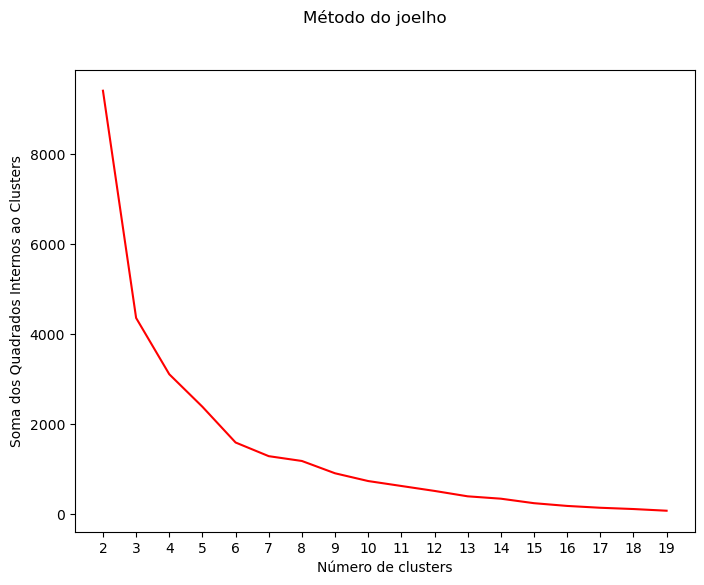

In [20]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_funcao_renal, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos notar 4 joelhos:
- x = `3`;
- x = `4`;
- x = `6`;
- x = `7`.

## Implementação do Algoritmo

### DATASET Funcao Renal

#### Recebendo os hiper-parâmetros testados acima

In [26]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt")

#### Criando o modelo - seguindo o GridSearchCV

In [27]:
kmeans_funcao_renal = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                             metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                             nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                             nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                             tolerancia = hiperparametros_kmeans.getTolerancia(),
                             semente = hiperparametros_kmeans.getSemente_randomica(),
                             algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_funcao_renal.fit(df_funcao_renal.values)

KMeans(algorithm='elkan', max_iter=500, n_clusters=13, n_init=4,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [28]:
print("Inercia: %.3f" % kmeans_funcao_renal.getDistanciaAoQuadrado())
print("Labels: ", kmeans_funcao_renal.getLabels())

Inercia: 389.541
Labels:  [0 0 0 ... 6 4 0]


In [29]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_funcao_renal = kmeans_funcao_renal.fit_predict(df_funcao_renal)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_funcao_renal, y_funcao_renal, metric = metrica))

davies_bouldin = davies_bouldin_score(df_funcao_renal, y_funcao_renal)
calinski = calinski_harabasz_score(df_funcao_renal, y_funcao_renal)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.916432991070862, 0.06138797315388123, 0.9156730802047989, 0.916432991070862, 0.9156730802047989, 0.916432991070862]
DAVIS-BOULDIN SCORE:  0.503934100967088
CALINSKI-HARABASZ SCORE:  53939.28151577068


#### Criando o modelo - seguindo o método do joelho

In [30]:
joelhos_percebidos = [3, 4, 6, 7]

for i in joelhos_percebidos:
    kmeans_funcao_renal = Kmeans(nro_clusters = i,
                                metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                tolerancia = hiperparametros_kmeans.getTolerancia(),
                                semente = hiperparametros_kmeans.getSemente_randomica(),
                                algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_funcao_renal.fit(df_funcao_renal.values)
    print("Inercia: %.3f" % kmeans_funcao_renal.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_funcao_renal.getLabels())

Inercia: 4354.136
Labels:  [0 0 0 ... 0 2 0]
Inercia: 3103.162
Labels:  [0 0 0 ... 3 2 0]
Inercia: 1585.942
Labels:  [0 0 0 ... 5 2 0]
Inercia: 1282.181
Labels:  [0 0 0 ... 6 5 0]


Acima, podemos notar que, a partir de `x = 6`, o ganho adicional é muito pequeno. Então para otimização dos testes `6` será escolhido como número de clusters.

In [31]:
kmeans_funcao_renal = Kmeans(nro_clusters = 6,
                             metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                             nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                             nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                             tolerancia = hiperparametros_kmeans.getTolerancia(),
                             semente = hiperparametros_kmeans.getSemente_randomica(),
                             algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_funcao_renal.fit(df_funcao_renal.values)

KMeans(algorithm='elkan', max_iter=500, n_clusters=6, n_init=4, random_state=42,
       tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [32]:
print("Inercia: %.3f" % kmeans_funcao_renal.getDistanciaAoQuadrado())
print("Labels: ", kmeans_funcao_renal.getLabels())

Inercia: 1585.942
Labels:  [0 0 0 ... 5 2 0]


In [33]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_funcao_renal = kmeans_funcao_renal.fit_predict(df_funcao_renal)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_funcao_renal, y_funcao_renal, metric = metrica))

davies_bouldin = davies_bouldin_score(df_funcao_renal, y_funcao_renal)
calinski = calinski_harabasz_score(df_funcao_renal, y_funcao_renal)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.7773957623742003, 0.09648184484186509, 0.7785646342027243, 0.7773957623742003, 0.7785646342027243, 0.7773957623742003]
DAVIS-BOULDIN SCORE:  0.6438692786026571
CALINSKI-HARABASZ SCORE:  30696.880328426898
